In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [6]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [7]:
df['city'] = cities

In [8]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [11]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [12]:
df = df[df['city'].isin(eligible_cities)]

In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [14]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\1598928411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [15]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [16]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [17]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [18]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [19]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\540685528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\540685528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\540685528.py:3: SettingWithCopyWarning: 
A value is trying t

In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [21]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [22]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [23]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\3055083752.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [24]:
df['last_five'] = last_five

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_19356\1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [25]:
#df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','']]

In [26]:
df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [27]:
df=df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [30]:
df = df.sample(df.shape[0])

In [31]:
df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
39380,Pakistan,Australia,Mirpur,95,54,8,8.636364,59.0,191
42140,Pakistan,Australia,Dubai,57,44,3,4.500000,21.0,96


In [32]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

In [33]:
encoded_df

,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
26187,St Lucia,171,10,6,9.327273,61.0,191,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11993,Southampton,33,84,9,5.500000,30.0,145,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23471,Colombo,162,7,7,8.601770,45.0,170,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14386,Southampton,118,36,4,8.428571,35.0,163,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25615,St Lucia,41,81,9,6.307692,33.0,149,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,Abu Dhabi,45,84,9,7.500000,39.0,155,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42155,Dubai,68,29,3,4.483516,21.0,96,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20762,London,137,11,5,7.541284,33.0,150,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15384,London,144,23,6,8.907216,53.0,169,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
encoded_df.columns

Index(['city', 'current_score', 'balls_left', 'wickets_left', 'crr',
       'last_five', 'runs_x', 'batting_team_Afghanistan',
       'batting_team_Australia', 'batting_team_Bangladesh',
       'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies'],
      dtype='object')

In [35]:
#Rename columns
encoded_df.columns = ['city', 'current_score', 'balls_left', 'wickets_left', 'crr',
       'last_five', 'runs_x','batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_New_Zealand', 'batting_team_Pakistan',
       'batting_team_South_Africa', 'batting_team_Sri_Lanka',
       'batting_team_West_Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New_Zealand', 'bowling_team_Pakistan',
       'bowling_team_South_Africa', 'bowling_team_Sri_Lanka',
       'bowling_team_WestIndies']

In [36]:
encoded_df.columns

Index(['city', 'current_score', 'balls_left', 'wickets_left', 'crr',
       'last_five', 'runs_x', 'batting_team_Afghanistan',
       'batting_team_Australia', 'batting_team_Bangladesh',
       'batting_team_England', 'batting_team_India',
       'batting_team_New_Zealand', 'batting_team_Pakistan',
       'batting_team_South_Africa', 'batting_team_Sri_Lanka',
       'batting_team_West_Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New_Zealand', 'bowling_team_Pakistan',
       'bowling_team_South_Africa', 'bowling_team_Sri_Lanka',
       'bowling_team_WestIndies'],
      dtype='object')

In [37]:
# Removing the 'city' column
encoded_df.drop(labels='city', axis=True, inplace=True)

In [38]:
X = encoded_df.drop(columns=['runs_x'])
y = encoded_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
X_train

,current_score,balls_left,wickets_left,crr,last_five,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New_Zealand,bowling_team_Pakistan,bowling_team_South_Africa,bowling_team_Sri_Lanka,bowling_team_WestIndies
13384,131,48,5,10.916667,58.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
37746,102,50,9,8.742857,29.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31184,79,45,8,6.320000,25.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16610,108,43,7,8.415584,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46394,125,33,6,8.620690,46.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28972,114,34,8,7.953488,41.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5972,137,17,4,7.980583,23.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5700,103,28,6,6.717391,31.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
28712,106,45,7,8.480000,45.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [40]:
X_train.columns

Index(['current_score', 'balls_left', 'wickets_left', 'crr', 'last_five',
       'batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_New_Zealand', 'batting_team_Pakistan',
       'batting_team_South_Africa', 'batting_team_Sri_Lanka',
       'batting_team_West_Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New_Zealand', 'bowling_team_Pakistan',
       'bowling_team_South_Africa', 'bowling_team_Sri_Lanka',
       'bowling_team_WestIndies'],
      dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [43]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
pred = regressor.predict(X_test)

In [45]:
pred

array([165.8474085 , 106.47551901, 118.06903203, ..., 197.9949012 ,
       146.2206855 , 155.56972768])

In [46]:
regressor.predict(X_test)[18]

173.66507712351367

In [47]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 13.66842697520906
MSE: 344.2473089458674
RMSE: 18.553902795527076


In [48]:
# Creating a pickle file for the classifier
filename = 'pipe_t20.pkl'
pickle.dump(regressor, open(filename, 'wb'))

C:\Users\sachin kumar ray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runs_x', ylabel='Density'>

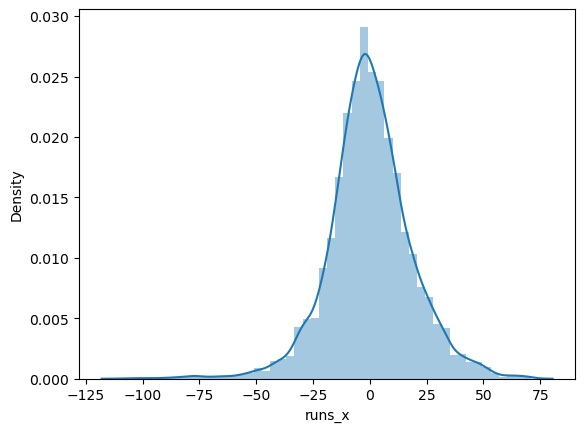

In [49]:
import seaborn as sns
sns.distplot(y_test-pred)